In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def load_dataset(train_path,valid_path):
  df_train = pd.read_csv(train_path).values
  df_valid = pd.read_csv(valid_path).values

  x_train = df_train[:,:-1]
  y_train = df_train[:,-1]
  x_test = df_valid[:,:-1]
  y_test = df_valid[:,-1]

  return x_train, y_train, x_test, y_test

In [ ]:
train_path = "/content/drive/MyDrive/Homework/dataset/bbcsports_train.csv"
valid_path = "/content/drive/MyDrive/Homework/dataset/bbcsports_val.csv"
x_train, y_train, x_test, y_test = load_dataset(train_path,valid_path)
print(f"x_train shape:{x_train.shape}")
print(f"x_test shape:{x_test.shape}")
print(f"y_train shape:{y_train.shape}")
print(f"y_test shape:{y_test.shape}")

x_train shape:(552, 4613)
x_test shape:(185, 4613)
y_train shape:(552,)
y_test shape:(185,)


In [ ]:
count_array_train = np.array([np.count_nonzero(y_train==0),np.count_nonzero(y_train==1),np.count_nonzero(y_train==2),np.count_nonzero(y_train==3),np.count_nonzero(y_train==4)])
count_array_valid = np.array([np.count_nonzero(y_test==0),np.count_nonzero(y_test==1),np.count_nonzero(y_test==2),np.count_nonzero(y_test==3),np.count_nonzero(y_test==4)])
print(f"Count of labels in y_train: {count_array_train}")
print(f"Percentage distribution in y_train: {count_array_train / np.sum(count_array_train) * 100}")
print(f"Count of labels in y_test: {count_array_valid}")
print(f"Percentage distribution in y_test: {count_array_valid / np.sum(count_array_valid) * 100}")

Count of labels in y_train: [ 77  86 198 114  77]
Percentage distribution in y_train: [13.94927536 15.57971014 35.86956522 20.65217391 13.94927536]
Count of labels in y_test: [24 38 67 33 23]
Percentage distribution in y_test: [12.97297297 20.54054054 36.21621622 17.83783784 12.43243243]


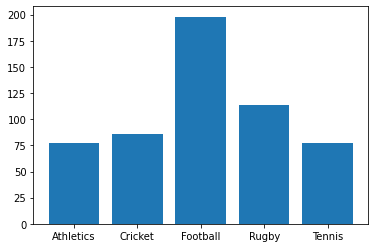

In [ ]:
import matplotlib.pyplot as plt
label_names = np.array(["Athletics","Cricket","Football","Rugby","Tennis"])

plt.bar(label_names,count_array_train)
plt.show()

In [ ]:
def naive_bayes_train(x_train,y_train):
  #create 2D array with elements showing log(P(X|Y))
  prop_array = np.zeros((len(np.unique(y_train)),x_train.shape[1]))
  for i in range(prop_array.shape[0]):
    word_count_at_label = np.sum(x_train[np.where(y_train==i)],axis=0)   
    prop_array[i] = word_count_at_label / np.sum(word_count_at_label)
  
  prop_array = np.log(prop_array, out=np.zeros_like(prop_array),where=(prop_array!=0))
  prop_array[prop_array==0] = -99999 
  return prop_array

In [ ]:
def naive_bayes_predict(prop_array,x_test,count_array_train):
  predictions = np.zeros((x_test.shape[0],1))
  proportions = np.log(count_array_train / np.sum(count_array_train))
  for index,test_set in enumerate(x_test):
    test_array = np.multiply(prop_array,test_set)    
    test_array = np.sum(test_array,axis=1).reshape(1,-1)   
    test_array = test_array + proportions   
    predictions[index][0] = np.argmax(test_array)

  return np.squeeze(predictions.reshape(1,-1))

In [ ]:
def evaluate_model(predictions,y_test):
  accurate = 0
  test_count = y_test.shape[0]
  for i in range(test_count):
    if predictions[i] == y_test[i]:
      accurate = accurate + 1
  
  accuracy = accurate/test_count * 100
  print(f"Accuracy is {accuracy}")
  print(f"Number of wrong predictions:{test_count-accurate}")

  #confusion matrix
  y_t = pd.Series(predictions, name='Actual')
  y_pred = pd.Series(y_test, name='Predicted')
  confusion_matrix = pd.crosstab(y_t, y_pred)
  print(confusion_matrix)

In [ ]:
prop_array = naive_bayes_train(x_train,y_train)
predictions = naive_bayes_predict(prop_array,x_test,count_array_train)
evaluate_model(predictions,y_test)

Accuracy is 97.2972972972973
Number of wrong predictions:5
Predicted   0   1   2   3   4
Actual                       
0.0        23   0   0   0   1
1.0         0  37   0   0   0
2.0         1   1  67   1   1
3.0         0   0   0  32   0
4.0         0   0   0   0  21


In [ ]:
def naive_bayes_train_extended(x_train,y_train,dirichlet_prior):
  #create 2D array with elements showing log(P(X|Y))
  total_words = x_train.shape[1]
  prop_array = np.zeros((len(np.unique(y_train)),total_words))
  for i in range(prop_array.shape[0]):    
    word_count_at_label = np.sum(x_train[np.where(y_train==i)],axis=0) + dirichlet_prior    
    prop_array[i] = word_count_at_label / np.sum(word_count_at_label)    
  
  prop_array = np.log(prop_array) 
  return prop_array

In [ ]:
prop_array = naive_bayes_train_extended(x_train,y_train,1)
predictions = naive_bayes_predict(prop_array,x_test,count_array_train)
evaluate_model(predictions,y_test)

Accuracy is 97.2972972972973
Number of wrong predictions:5
Predicted   0   1   2   3   4
Actual                       
0.0        24   0   0   0   1
1.0         0  35   0   0   0
2.0         0   1  66   0   0
3.0         0   2   1  33   0
4.0         0   0   0   0  22
